# 環境設定

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.8.2


# 匯入資料

In [2]:
!gdown 1GuTgP9b462jWqfdx4AntFjhhinpxxcYW

Downloading...
From: https://drive.google.com/uc?id=1GuTgP9b462jWqfdx4AntFjhhinpxxcYW
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 45.0MB/s]


In [135]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head(5)
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

# 剔除離群值

In [ ]:
#剔除中間值
n=0.1
IQR = 0
count = []

#IQR = Q3-Q1
for i in range(len(wine_data.iloc[0,:1])):
  IQR = np.percentile(wine_data.iloc[:,i],75) - np.percentile(wine_data.iloc[:,i],25)

  count = []
  for j in range(len(wine_data.iloc[:,i])):
    if( np.percentile(wine_data.iloc[:,i],75)-n*IQR <= wine_data.iloc[j,i] and wine_data.iloc[j,i] < np.percentile(wine_data.iloc[:,i],75)+n*IQR):
      count.append(j) 

  for k in count:
    wine_data = wine_data.drop(labels=k, axis=0) 
  wine_data = wine_data.reset_index(drop=True)
 
print(wine_data)

In [126]:
#剔除離群值
n=3
IQR = 0
count = []

#IQR = Q3-Q1
for i in range(len(wine_data.iloc[0,:-1])):
  IQR = np.percentile(wine_data.iloc[:,i],75) - np.percentile(wine_data.iloc[:,i],25)

  count = []
  for j in range(len(wine_data.iloc[:,i])):
    if( wine_data.iloc[j,i] > np.percentile(wine_data.iloc[:,i],75)+n*IQR ):
      count.append(j) 

  for j in range(len(wine_data.iloc[:,i])):
    if( wine_data.iloc[j,i] < np.percentile(wine_data.iloc[:,i],75)-n*IQR ):
      count.append(j)

  for k in count:
    wine_data = wine_data.drop(labels=k, axis=0) 
  wine_data = wine_data.reset_index(drop=True)
 
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1423            6.2             0.600         0.08             2.0      0.090   
1424            5.9             0.550         0.10             2.2      0.062   
1425            6.3             0.510         0.13             2.3      0.076   
1426            5.9             0.645         0.12             2.0      0.075   
1427            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Split input and output

In [123]:
x = wine_data.iloc[:, :-1]
y = wine_data.iloc[:, -1]

print(f"Columns of input: {list(x.columns)}")
print(f"Columns of output: {y.name}")
print(f"Shape of input: {x.shape}")
print(f"Shape of output: {y.shape}")

Columns of input: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Columns of output: quality
Shape of input: (1599, 11)
Shape of output: (1599,)


### 特徵選擇

In [143]:
x = wine_data.iloc[:,[1,2,6,9,10]]
y = wine_data.iloc[:, -1]

print(f"Columns of input: {list(x.columns)}")
print(f"Columns of output: {y.name}")
print(f"Shape of input: {x.shape}")
print(f"Shape of output: {y.shape}")

Columns of input: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']
Columns of output: quality
Shape of input: (1599, 5)
Shape of output: (1599,)


### 增加特徵

In [144]:
x = wine_data
a100 = x.to_numpy()

for i in range(11):
  for j in range(i+1,11):
    x.insert(11, "insert", (a100[:,i]**2+a100[:,j]**2)/4 , allow_duplicates=True)

print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Split train and test data

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1279, 67)
Shape of x_test: (320, 67)
Shape of y_train: (1279,)
Shape of y_test: (320,)


# Normalize data

In [146]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. Neural network

## Build model

In [147]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=64, input_shape=(x_train.shape[1],), activation='elu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 64)                4352      
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dense_71 (Dense)            (None, 2)                 66        
                                                                 
Total params: 7,554
Trainable params: 7,554
Non-trainable params: 0
_________________________________________________________________


## Setting callback function

In [148]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

## Train model

In [149]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6855 - accuracy: 0.6130 - val_loss: 0.5785 - val_accuracy: 0.7281
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5781 - accuracy: 0.7248 - val_loss: 0.5051 - val_accuracy: 0.7844
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.7709 - val_loss: 0.4525 - val_accuracy: 0.8156
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8084 - val_loss: 0.4060 - val_accuracy: 0.8406
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4155 - accuracy: 0.8421 - val_loss: 0.3612 - val_accuracy: 0.8875
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8796 - val_loss: 0.3173 - val_accuracy: 0.9156
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.9030 - val_loss: 0.2754 - val_accuracy: 0.9312
Epoch 8/100


## After training


In [150]:
model.save("redwine_model_2.h5")

## Plot learning curve

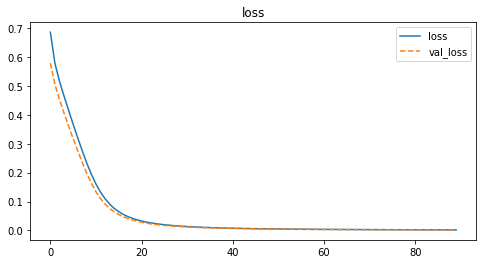

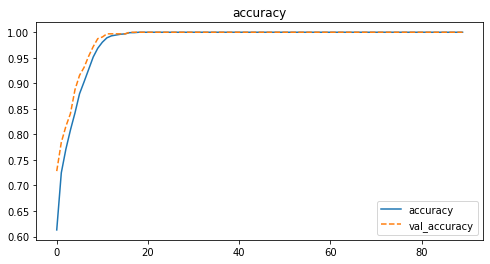

In [151]:
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

## Use model

In [ ]:
model = tf.keras.models.load_model("redwine_model_2.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [ ]:
wine_data_2 = pd.read_csv('testset.csv')
wine_data_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.7,0.57,0.21,1.5,0.069,4,9.0,0.99458,3.16,0.54,9.8
1,7.9,0.34,0.36,1.9,0.065,5,10.0,0.99419,3.27,0.54,11.2
2,8.6,0.42,0.39,1.8,0.068,6,12.0,0.99516,3.35,0.69,11.7
3,9.9,0.74,0.19,5.8,0.111,33,76.0,0.99878,3.14,0.55,9.4
4,7.2,0.36,0.46,2.1,0.074,24,44.0,0.99534,3.40,0.85,11.0


### 資料正規化

In [ ]:
x_test_2 = scaler.transform(wine_data_2)

In [ ]:
predict = model.predict(x_test_2)
predict = np.argmax(predict, axis=1)

In [ ]:
test_label = pd.DataFrame()
test_label["data_id"] = np.arange(1, len(predict)+1)
test_label["label"] = predict
test_label = test_label.sort_values(by='data_id')
test_label.to_csv('submission.csv', index=False)

# 2. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth=10)
# Fit the training data
dt_basic.fit(x_train,y_train)
# Predict based on test data
y_preds = dt_basic.predict(x_test)

In [ ]:
# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value

confusion_matrix(y_test,y_preds)

print(classification_report(y_test,y_preds))

# Calculate the number of nodes in the tree
dt_basic.tree_.node_count

# Create a Parameter grid
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5

In [ ]:
dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)

grid.fit(x_train,y_train)

cv_result = pd.DataFrame(grid.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004675,0.000853,0.001583,0.000226,gini,4,20,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.716157,...,0.724175,0.014274,82,0.760131,0.772180,0.778993,0.781182,0.776805,0.773858,0.007482
1,0.004205,0.000182,0.002594,0.001771,gini,4,20,60,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.724891,...,0.725040,0.012894,81,0.756846,0.767798,0.778993,0.781182,0.776805,0.772325,0.008979
2,0.004096,0.000144,0.001534,0.000108,gini,4,20,100,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.724891,...,0.727668,0.014020,56,0.756846,0.756846,0.763676,0.781182,0.776805,0.767071,0.010144
3,0.003938,0.000182,0.001993,0.000945,gini,4,20,140,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.724891,...,0.728545,0.012416,49,0.756846,0.756846,0.763676,0.762582,0.776805,0.763351,0.007299
4,0.003850,0.000174,0.002628,0.001918,gini,4,20,180,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.711790,...,0.722416,0.026684,87,0.743702,0.756846,0.762582,0.739606,0.776805,0.755908,0.013393


In [ ]:
grid.best_params_
grid.best_score_
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       min_samples_split=20)

In [ ]:
best_grid.fit(x_train,y_train)
y_preds = best_grid.predict(x_test)
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value

0.7237762237762237

In [ ]:
confusion_matrix(y_test,y_preds)

array([[105,  32],
       [ 47, 102]])

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       137
           1       0.76      0.68      0.72       149

    accuracy                           0.72       286
   macro avg       0.73      0.73      0.72       286
weighted avg       0.73      0.72      0.72       286



In [ ]:
predict = best_grid.predict(x_test_2)

test_label = pd.DataFrame()
test_label["data_id"] = np.arange(1, len(predict)+1)
test_label["label"] = predict
test_label = test_label.sort_values(by='data_id')
test_label.to_csv('submission_DT.csv', index=False)

[0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# 3. k-means

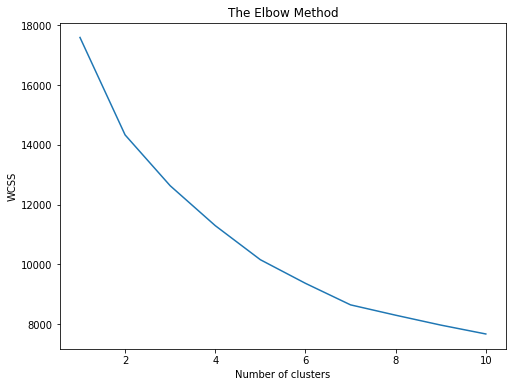

--- 0.07952332496643066 seconds ---


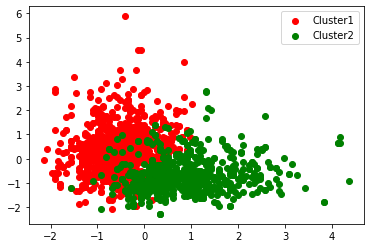

In [ ]:
#import libraries
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#get model duration
import time
from datetime import date

wine_data = pd.read_csv('winequality-red.csv')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

X = wine_data.iloc[:,0:11]
y = wine_data['quality']

X_scaled = StandardScaler().fit_transform(X)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Applying kmeans to the dataset, set k=2
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

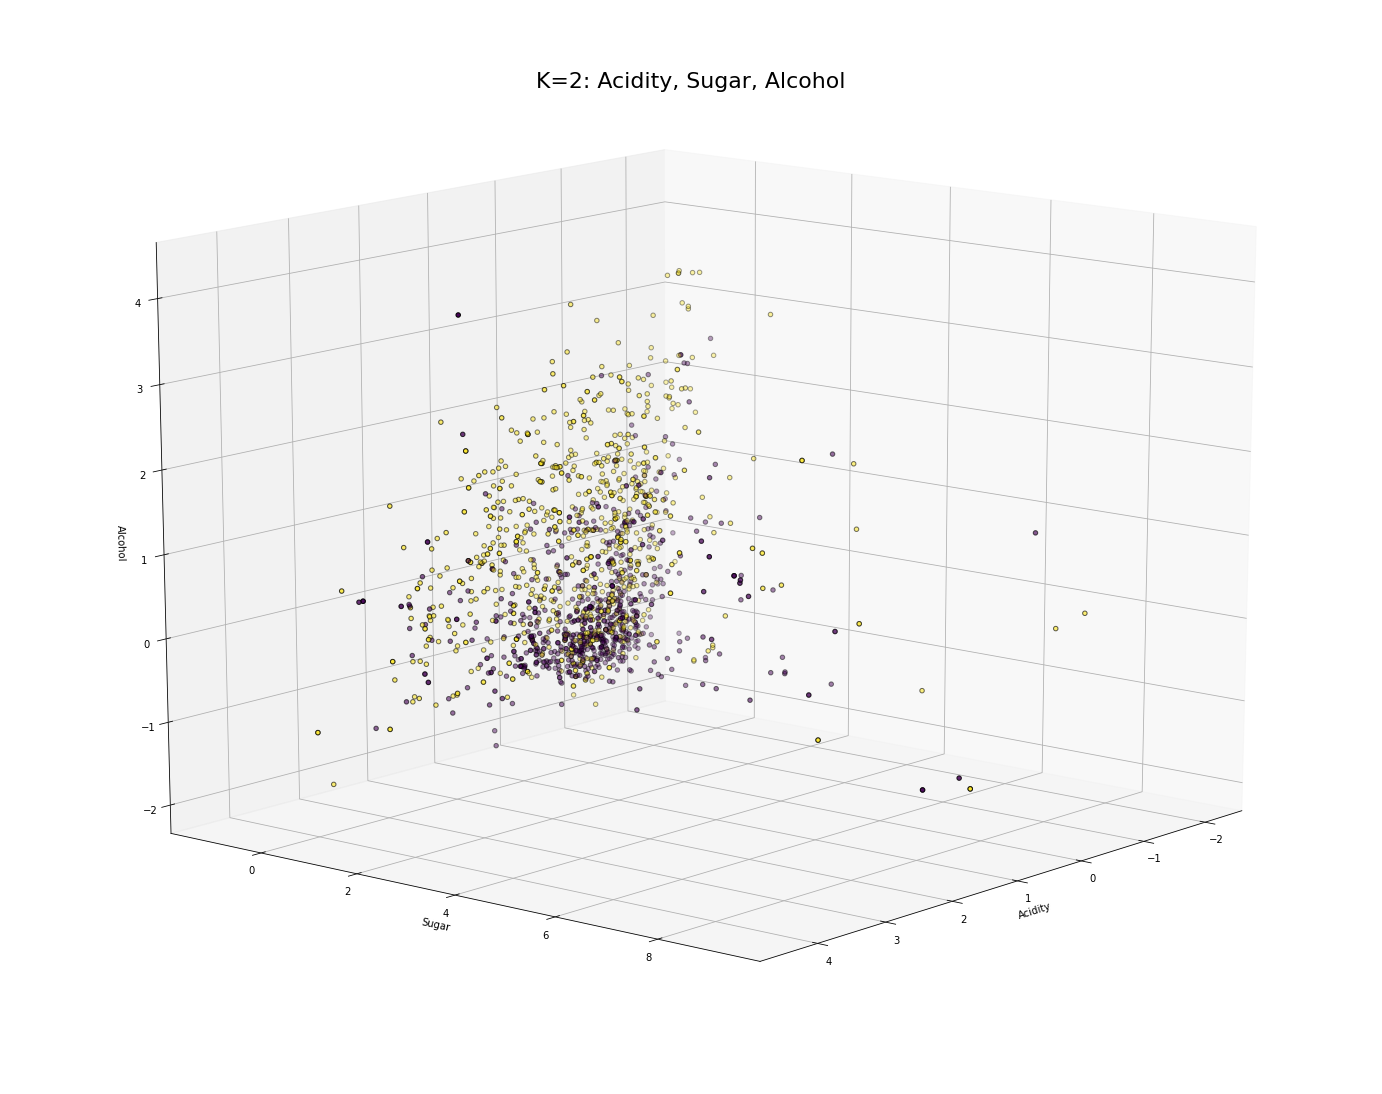

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(X_scaled[:,0], X_scaled[:,3], X_scaled[:,10],c=y, edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)

In [ ]:
#evaluate model
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

kmeans.inertia_

14330.119811335491

In [ ]:
#Applying kmeans to the dataset, set k=2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=6)
pc_X = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(pc_X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.3447151184082031 seconds ---


11788.865246179306

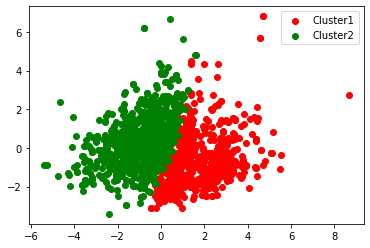

In [ ]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(pc_X[clusters==i,0],
               pc_X[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

#evaluate model
metrics.silhouette_score(pc_X, labels, metric='euclidean')

kmeans.inertia_

In [ ]:
kmeans = KMeans(n_clusters = 11)
predict = kmeans.fit_predict(x_test_2)
for i in range(len(predict)):
  if(predict[i]>5): predict[i] = 1
  else: predict[i] = 0

test_label = pd.DataFrame()
test_label["data_id"] = np.arange(1, len(predict)+1)
test_label["label"] = predict
test_label = test_label.sort_values(by='data_id')
test_label.to_csv('submission_K-M.csv', index=False)